In [27]:
#Import Dependencies and Read in CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Moma = pd.read_csv('Moma Artists.csv')
plt.rcParams['font.sans-serif'] = "Arial Black"

In [28]:
Moma.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [29]:
#Drop Artist Organzations (Drop Rows with null Gender)
Moma.dropna(subset=['Gender'], how='all', inplace=True)
Moma.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [113]:
Momasampledf = Moma.head(100)
html = Momasampledf.to_html()
print (html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ConstituentID</th>
      <th>DisplayName</th>
      <th>ArtistBio</th>
      <th>Nationality</th>
      <th>Gender</th>
      <th>BeginDate</th>
      <th>EndDate</th>
      <th>Wiki QID</th>
      <th>ULAN</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>Robert Arneson</td>
      <td>American, 1930–1992</td>
      <td>American</td>
      <td>Male</td>
      <td>1930</td>
      <td>1992</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>Doroteo Arnaiz</td>
      <td>Spanish, born 1936</td>
      <td>Spanish</td>
      <td>Male</td>
      <td>1936</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>Bill Arnold</td>
      <td>American, born 1941</td>
      <td>American</td>
      <td>Male</td>
      <td>1941</td>
    

In [31]:
#Find Years Artists Died
Years = Moma['EndDate'].unique()
Years

array([1992,    0, 1966, 1995, 1997, 1964, 2013, 1942, 1941, 1940, 2000,
       1976, 1949, 2008, 2017, 1973, 1953, 1991, 1971, 2010, 2011, 2007,
       1994, 1967, 1881, 1984, 2002, 1951, 1988, 1987, 1978, 1993, 1894,
       1999, 1975, 1996, 1969, 2012, 1983, 1989, 1959, 2003, 1936, 2006,
       1961, 1998, 1980, 1982, 1877, 1956, 1879, 1946, 1887, 1985, 2005,
       1927, 1952, 1871, 1931, 1960, 1948, 2009, 2004, 1965, 1955, 2001,
       1981, 1990, 1924, 1986, 1968, 1882, 1958, 2014, 2016, 1972, 1944,
       1905, 1938, 1902, 1934, 1979, 1963, 2015, 1962, 1954, 2018, 1898,
       1903, 1950, 1922, 1893, 1910, 1925, 1908, 1957, 1900, 1909, 1977,
       1828, 1933, 1870, 1876, 1896, 1916, 1930, 1970, 1885, 1947, 1943,
       1929, 1912, 1919, 1937, 1945, 1939, 1890, 1906, 1926, 1856, 1932,
       2019, 1863, 1974, 1875, 1913, 1892, 1878, 1928, 1901, 1920, 1917,
       1935, 1886, 1889, 1883, 1904, 1918, 1921, 1899, 1869, 1915, 1914,
       1855, 1865, 1911, 1907, 1884, 1872, 1895, 18

In [32]:
# 
ArtistDeathCount = Moma.groupby('EndDate').count()
ArtistDeathCount=ArtistDeathCount.reset_index()
ArtistDeathCount = ArtistDeathCount[['EndDate', 'ConstituentID']].rename(columns={"ConstituentID": "Count"})
DeathYears=ArtistDeathCount.drop(ArtistDeathCount.index[0])
DeathYears.head()


,EndDate,Count
1,1795,1
2,1828,2
3,1848,1
4,1851,1
5,1852,1


In [33]:
#Create a DF of Range With Every Year in Range
Range = list(range(DeathYears['EndDate'].min(), DeathYears['EndDate'].max()))
YearRangedf = pd.DataFrame(Range, columns=['EndDate'])
YearRangedf.head()

,EndDate
0,1795
1,1796
2,1797
3,1798
4,1799


In [34]:
#Merge 
YearswithDeathCountdf=YearRangedf.merge(DeathYears, how='outer')
#Fill all Null Values with 0
YearswithDeathCountdf=YearswithDeathCountdf.fillna(0)
YearswithDeathCountdf.head()

,EndDate,Count
0,1795,1.0
1,1796,0.0
2,1797,0.0
3,1798,0.0
4,1799,0.0


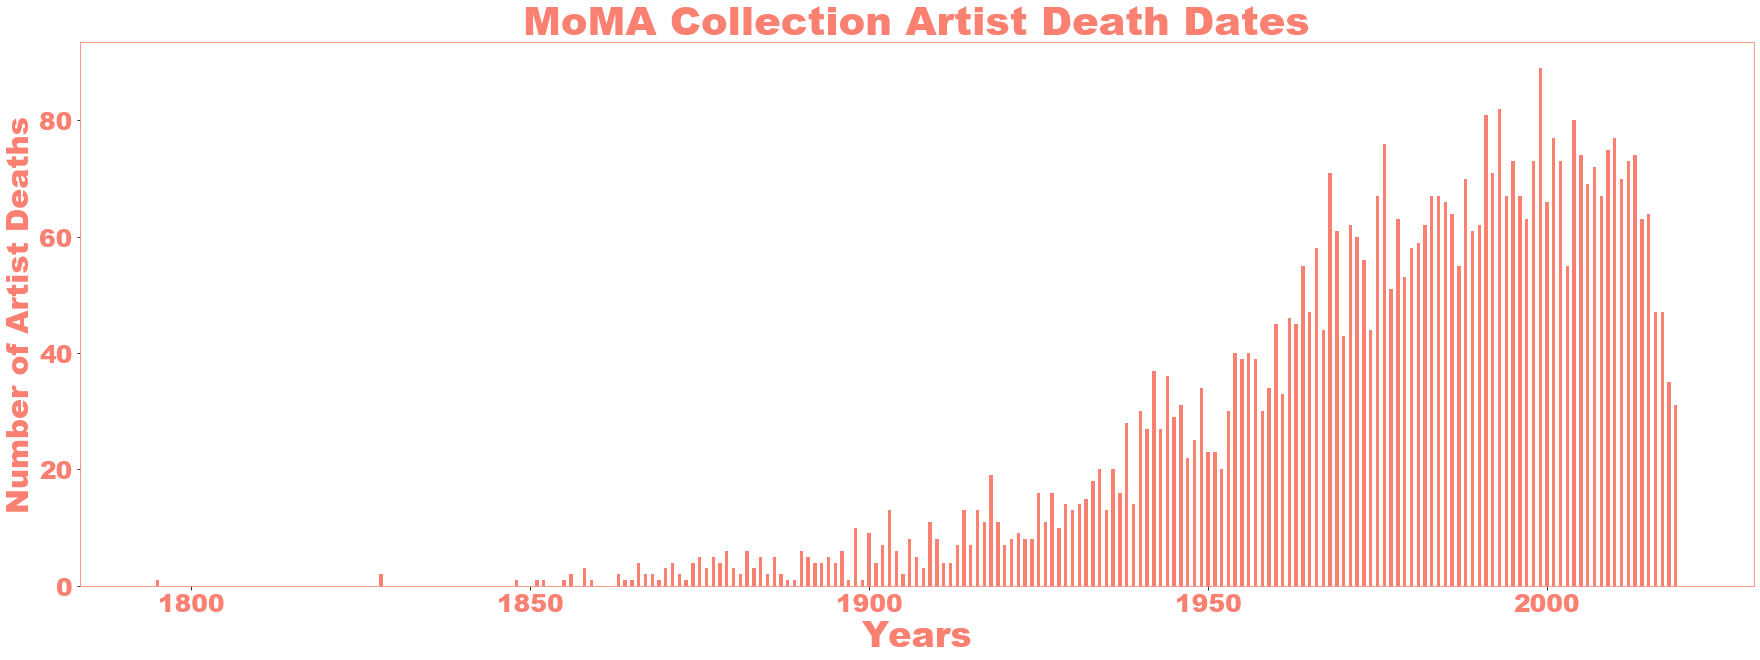

In [112]:
#Are What Years are the most Robustly Represented by the Collection?
#Remove Artists Who are still alive from DF
plt.figure(figsize=(30, 10)) 
plt.bar(YearswithDeathCountdf['EndDate'], YearswithDeathCountdf['Count'], width = .5, color='salmon')
plt.xlabel('Years',size= 35, color='salmon')
plt.xticks(size=25, color='salmon')
plt.ylabel('Number of Artist Deaths', size=30, color='salmon')
plt.yticks(size=25, color='salmon')
plt.title('MoMA Collection Artist Death Dates', size=40, color='salmon')
plt.savefig('MOMA_Artist_Death_Dates.png', transparent=True, bbox_inches = 'tight')

In [44]:
#MoMA collects work made after 1880, when the atmosphere was ripe for avant-garde artists \
#to take their work in new, surprising, and modern directions.

In [45]:
Nationalities = Moma[['Nationality', 'ConstituentID']].groupby('Nationality').count().rename(columns={"ConstituentID": "Count"})
Nationalities=Nationalities.reset_index()
Nationalities.head()

,Nationality,Count
0,Afghan,1
1,Albanian,4
2,Algerian,6
3,American,4962
4,Argentine,142


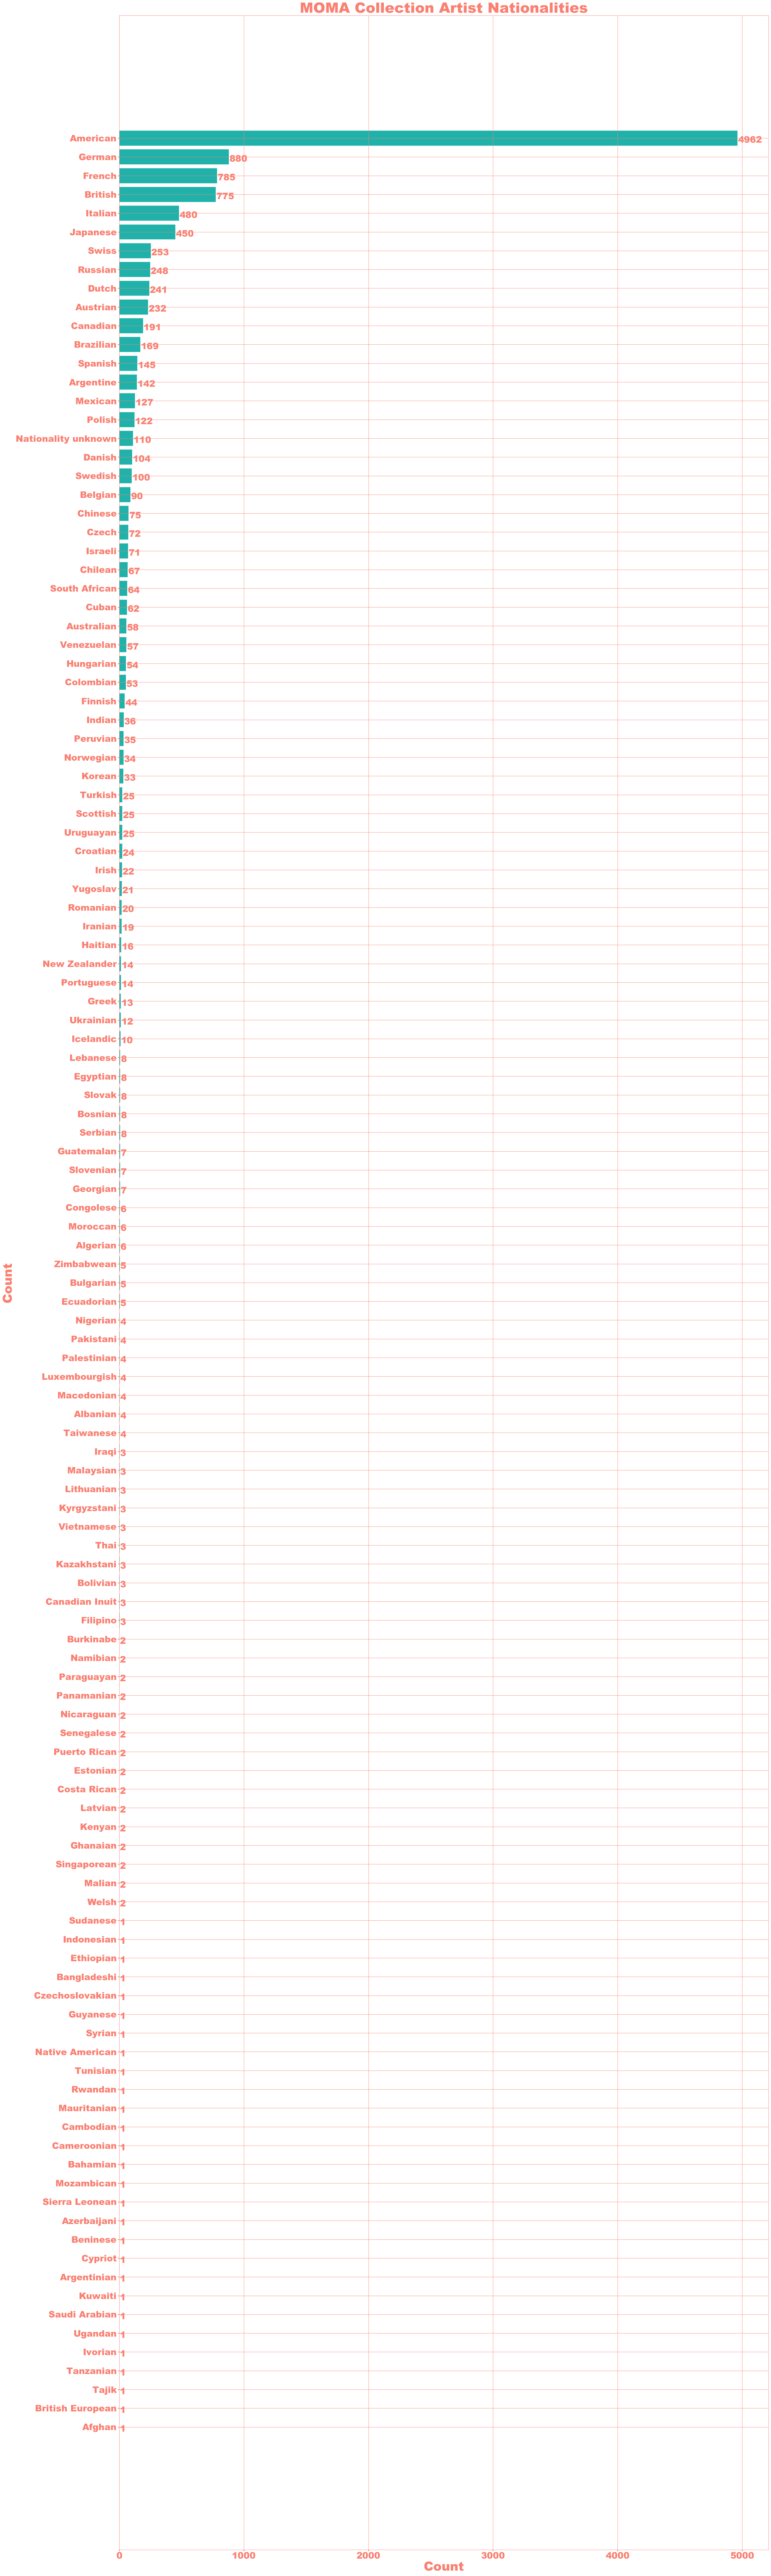

In [110]:

Nationalities = Nationalities.sort_values(by=['Count'])
import math
#Plot Horizontal Bar Chart
plt.figure(figsize=(30, 100), dpi=120) 
plt.barh(Nationalities['Nationality'], Nationalities['Count'], color='lightseagreen')
plt.ylabel('Count', color='salmon', size=35)
plt.yticks(color='salmon', size=25)
plt.xlabel('Count', color='salmon', size=35)
plt.xticks(color='salmon', size=25)
plt.title('MOMA Collection Artist Nationalities', size=40, color='salmon')
plt.grid(b=None, which='major', axis='both', color='salmon')
for i, v in enumerate(Nationalities['Count']):
    plt.text(v+4, i-.25, str(v), color='salmon', fontweight='bold', size=25)
plt.tight_layout()
plt.savefig('MOMA_Artist_Nationalities.png', transparent=True, bbox_inches = 'tight')

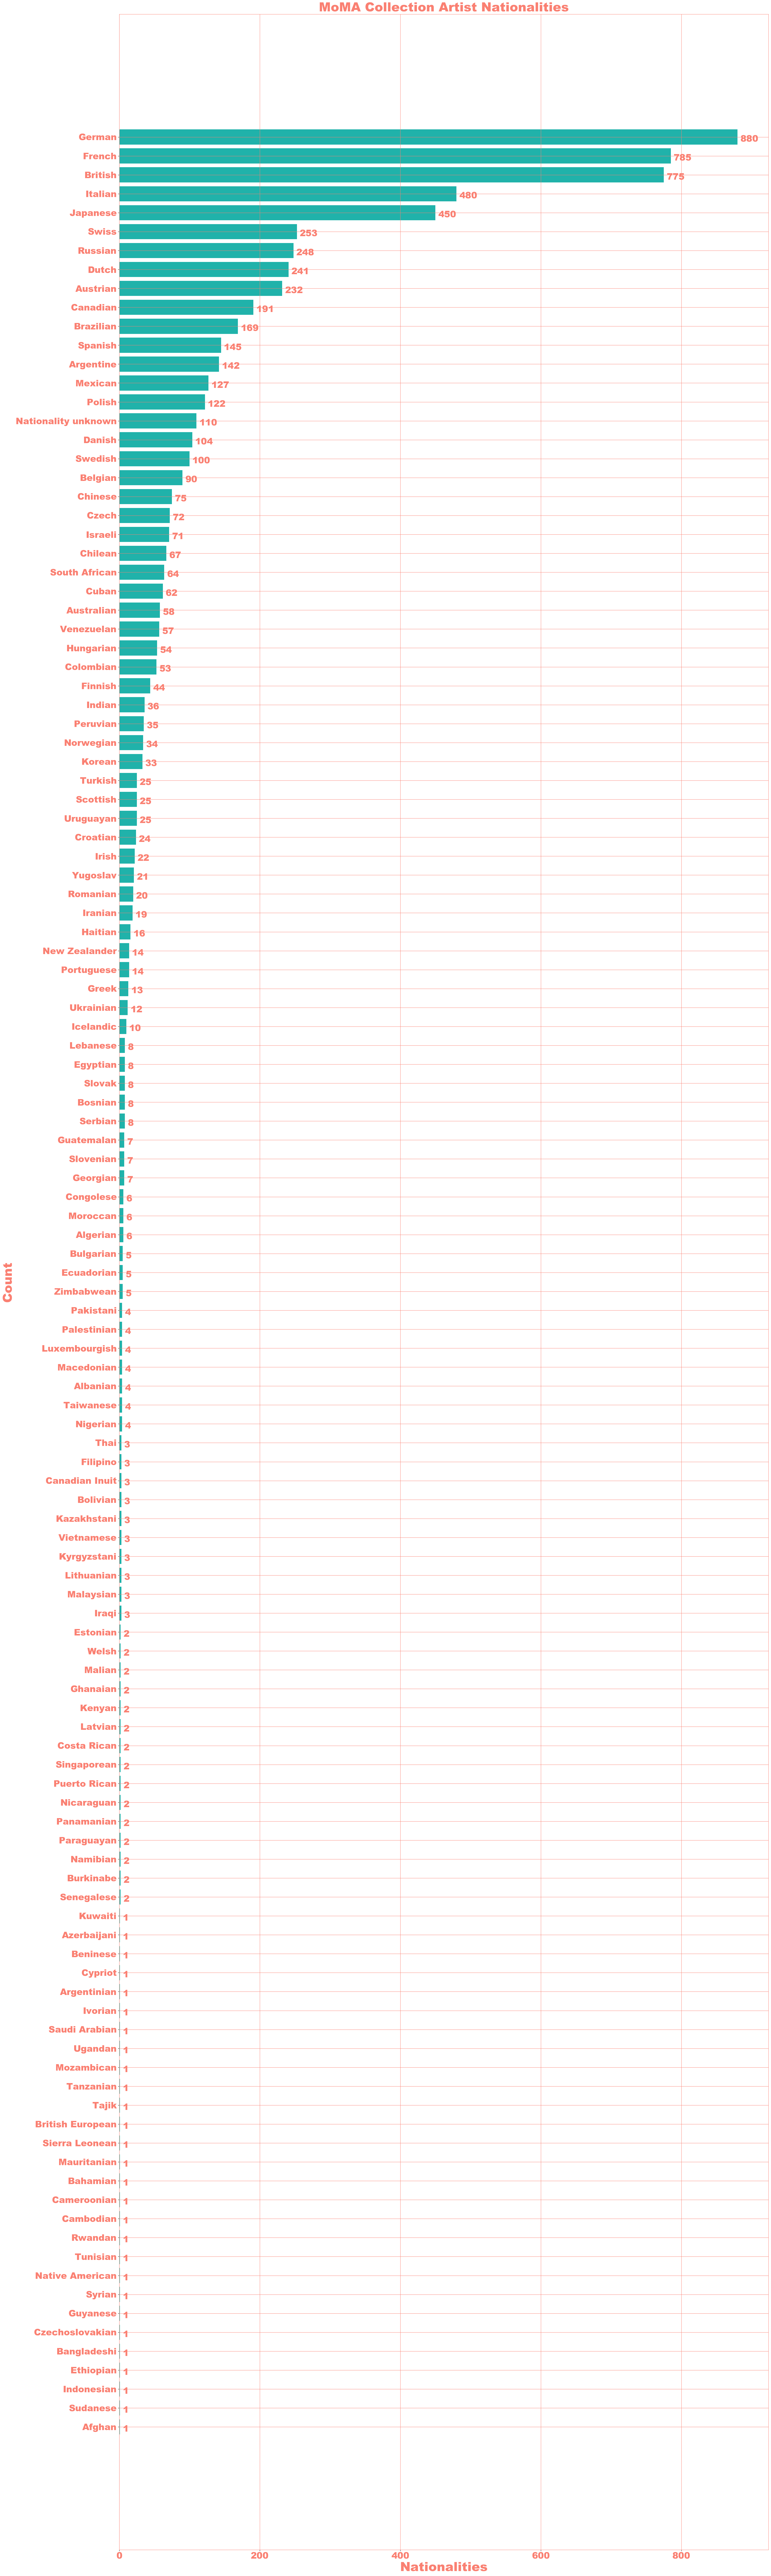

In [111]:
#Remove America from Dataframe
NationalitieswoUS = Nationalities[Nationalities['Nationality'] != 'American']
NationalitieswoUS = NationalitieswoUS.sort_values(by=['Count'])

#Plot Horizontal Bar Chart
plt.figure(figsize=(30, 100), dpi=120) 
plt.barh(NationalitieswoUS['Nationality'], NationalitieswoUS['Count'], color='lightseagreen')
plt.xlabel('Nationalities', color='salmon', size=35)
plt.xticks(color='salmon', size=25)
plt.ylabel('Count', color='salmon', size=35)
plt.yticks(color='salmon', size=25)
plt.grid(b=None, which='major', axis='both', color='salmon')
plt.title('MoMA Collection Artist Nationalities', color='salmon', size=35)
for i, v in enumerate(NationalitieswoUS['Count']):
    plt.text(v+4, i-.25, str(v), color='salmon', fontweight='bold', size=25)
plt.tight_layout()
plt.savefig('MOMA_Artist_NationalitiesWOUSA.png', transparent=True, bbox_inches = 'tight')

In [14]:
US_males=Moma.loc[Moma['Gender'] == 'Male']
US_males

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN
5,6,Danilo Aroldi,"Italian, born 1925",Italian,Male,1925,0,NaN,NaN
6,7,Bill Aron,"American, born 1941",American,Male,1941,0,NaN,NaN
7,9,David Aronson,"American, born Lithuania 1923",American,Male,1923,0,Q5230870,500003363.0
9,11,Jean (Hans) Arp,"French, born Germany (Alsace). 1886–1966",French,Male,1886,1966,Q153739,500031000.0
10,12,Jüri Arrak,"Estonian, born 1936",Estonian,Male,1936,0,NaN,NaN


In [95]:
US_females=Moma.loc[(Moma['Gender'] == 'Female') & (Moma['Nationality']=='American')]
USFemalesLen = len(US_females['Gender'])
USFemalesLen

1124

In [96]:
US_males=Moma.loc[(Moma['Gender'] == 'Male') & (Moma['Nationality']=='American')]
USMalesLen = len(US_males['Gender'])
USMalesLen

3831

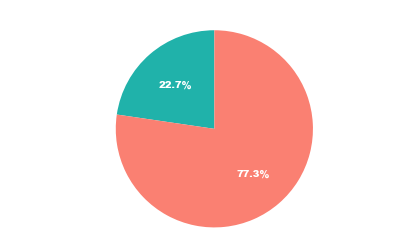

In [97]:
GenderCount =[USFemalesLen, USMalesLen]
labels = ['American Female Artists', 'American Male Artists']

fig1, ax1 = plt.subplots()
ax1.pie(GenderCount, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'salmon'], textprops=dict(color='white'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.title('American Artist Gender Distribution', color='white')
plt.show()

fig1.savefig('AmericanArtistsGender.png', transparent=True, quality=90, dpi=150)

In [98]:
Mexican_females=Moma.loc[(Moma['Gender'] == 'Female') & (Moma['Nationality']=='Mexican')]
MexFemalesLen = len(Mexican_females['Gender'])
Mexican_Males=Moma.loc[(Moma['Gender'] == 'Male') & (Moma['Nationality']=='Mexican')]
MexMalesLen = len(Mexican_Males['Gender'])


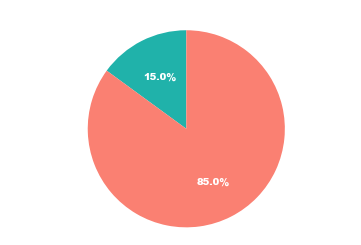

In [99]:
GenderCount =[MexFemalesLen, MexMalesLen]
labels = ['Mexican Female Artists', 'Mexican Male Artists']

fig1, ax1 = plt.subplots()
ax1.pie(GenderCount, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'salmon'], textprops=dict(color='white'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mexican Artist Gender Distribution', color='white')
plt.show()
fig1.savefig('MexicanArtistsGender.png', transparent=True, quality=90, dpi=150)

In [100]:
Japanese_females=Moma.loc[(Moma['Gender'] == 'Female') & (Moma['Nationality']=='Japanese')]
JapaneseFemalesLen = len(Japanese_females['Gender'])
Japanese_Males=Moma.loc[(Moma['Gender'] == 'Male') & (Moma['Nationality']=='Japanese')]
JapaneseMalesLen = len(Japanese_Males['Gender'])

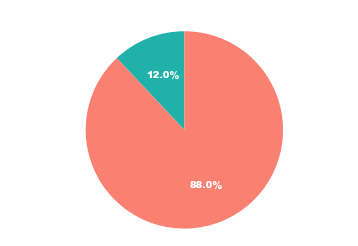

In [107]:
GenderCount =[JapaneseFemalesLen, JapaneseMalesLen]
labels = ['Japanese Female Artists', 'Japanese Male Artists']

fig1, ax1 = plt.subplots()
ax1.pie(GenderCount, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'salmon'], textprops=dict(color='white'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Japanese Artist Gender Distribution', color='white')
plt.show()
fig1.savefig('JapaneseArtistsGender.png', transparent=True, quality=90, dpi=150)

In [102]:
Brazilian_females=Moma.loc[(Moma['Gender'] == 'Female') & (Moma['Nationality']=='Brazilian')]
BrazilianFemalesLen = len(Brazilian_females['Gender'])
Brazilian_Males=Moma.loc[(Moma['Gender'] == 'Male') & (Moma['Nationality']=='Brazilian')]
BrazilianMalesLen = len(Brazilian_Males['Gender'])

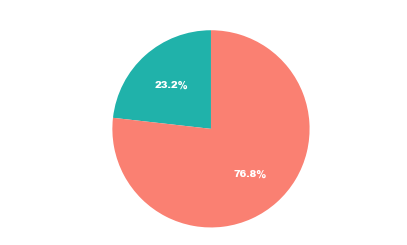

In [103]:
GenderCount =[BrazilianFemalesLen, BrazilianMalesLen]
labels = ['Brazilian Female Artists', 'Brazilian Male Artists']

fig1, ax1 = plt.subplots()
ax1.pie(GenderCount, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'salmon'], textprops=dict(color='white'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Brazilian Artist Gender Distribution', color='white')
plt.show()
fig1.savefig('BrazilianArtistsGender.png', transparent=True, quality=90, dpi=150)

In [104]:
Females=Moma.loc[(Moma['Gender'] == 'Female')]
FemalesLen = len(Females['Gender'])
FemalesLen

2347

In [105]:
Males=Moma.loc[(Moma['Gender'] == 'Male')]
MalesLen = len(Males['Gender'])
MalesLen

10233

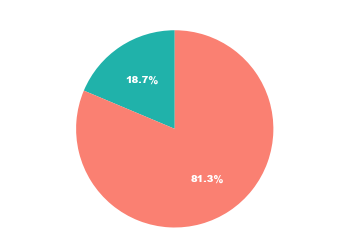

In [106]:
GenderCount =[FemalesLen, MalesLen]
labels = ['Female Artists', 'Male Artists']

fig1, ax1 = plt.subplots()
ax1.pie(GenderCount, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'salmon'], textprops=dict(color='white'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('MoMA Artist Gender Distribution', color='white')
plt.show()
fig1.savefig('CompositeArtistsGender.png', transparent=True, quality=90, dpi=150)